<a href="https://colab.research.google.com/github/mrrkdas/LazyProgrammer-DeepLearning-Course/blob/main/Linear_Classification_with_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Loading Data and Getting to know it

In [3]:
data = load_breast_cancer()

type(data) # A bunch basically functions as a dictionary so it has keys

sklearn.utils.Bunch

In [5]:
data.keys() # Data is our X, and target is our Y

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape # 569 entries, 30 features per entry

(569, 30)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
data.target_names # 0 for malignant and 1 for benign

array(['malignant', 'benign'], dtype='<U9')

## Train Test Split, and Standard Scaling

In [14]:
X = data.data # All the data.feature_names
y = data.target # 0's and 1's

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [19]:
# Instantiating the standard scaler
scaler = StandardScaler()

# Applying fit_transform and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Can't let model see the test data

## Model

In [21]:
model = Sequential()

# Layers: 1 10 neuron dense layer with an input shape of 30 with relu activation, and then an output layer with 1 neuron with sigmoid activation
model.add(Dense(10, activation = "relu", input_shape = (30,))) # Was having trouble on this part, I believe it is 30 because there are 30 features
model.add(Dense(1, activation = 'sigmoid'))

# Compiling Model 
model.compile(loss = 'binary_crossentropy', # Only 0's and 1's
              optimizer = 'adam', 
              metrics = ["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [23]:
r = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 50)

Epoch 1/50
12/12 [==============================] - 2s 47ms/step - loss: 0.5313 - accuracy: 0.7717 - val_loss: 0.4816 - val_accuracy: 0.8670
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4301 - accuracy: 0.8346 - val_loss: 0.4002 - val_accuracy: 0.9202
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 0.3614 - accuracy: 0.8793 - val_loss: 0.3445 - val_accuracy: 0.9362
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.3131 - accuracy: 0.9134 - val_loss: 0.3048 - val_accuracy: 0.9468
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2786 - accuracy: 0.9213 - val_loss: 0.2753 - val_accuracy: 0.9468
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2528 - accuracy: 0.9239 - val_loss: 0.2520 - val_accuracy: 0.9415
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2316 - accuracy: 0.9370 - val_loss: 0.2337 - val_accuracy: 0.9362
Epoch 8/50
12/12

## Plotting History

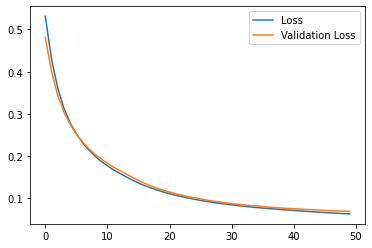

In [27]:
import matplotlib.pyplot as plt

# plt.plot(50, r['loss']) <-- Mistake, had to look at answer notebook, forgot to put history, and the amount of epochs is not needed
#Plotting Loss
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

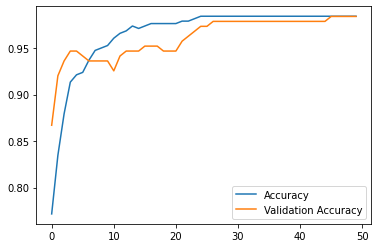

In [28]:
plt.plot(r.history["accuracy"], label = 'Accuracy')
plt.plot(r.history["val_accuracy"], label = 'Validation Accuracy') # Why is the validation accuracy weird?
plt.legend()